Hybrid 1D CNN–LSTM model to estimate diaphragmatic EMG (EMGdi) windows from ECG windows

Loading and preparing data...
Filtering signals...
Normalizing signals...
Detecting R peaks...
1761 R peaks detected.


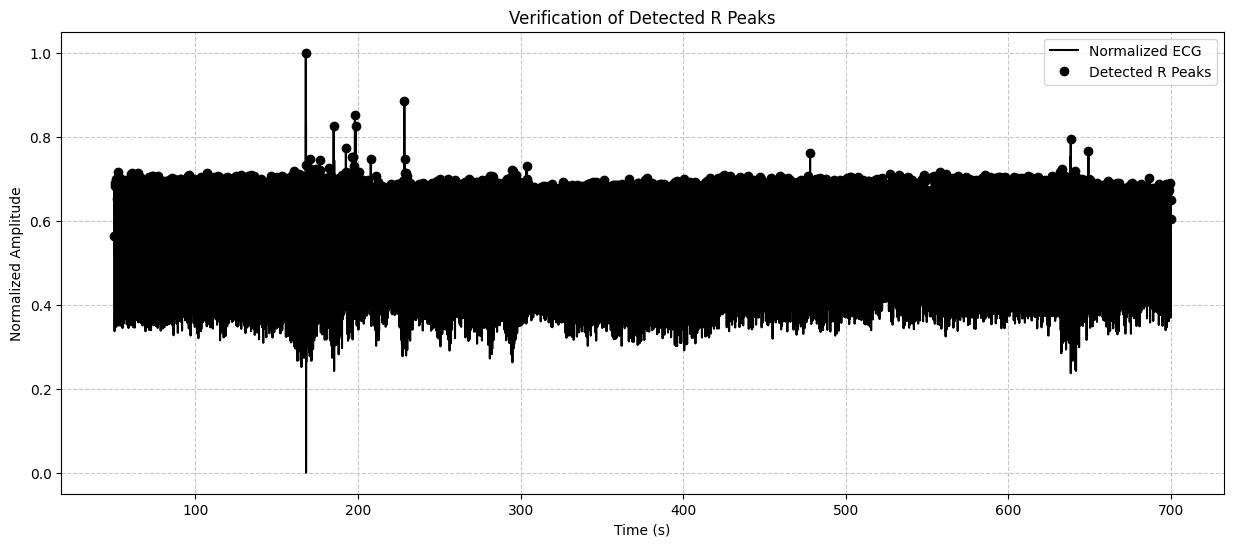

Average RR interval: 0.3693 seconds.

Training model in batches to save memory...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ecg           │ (None, 500, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_emg_past1     │ (None, 500, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_emg_past2     │ (None, 500, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 500, 32)   │        128 │ input_ecg[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 500, 16)   │         64 │ input_emg_past1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 500, 16)   │         64 │ input_emg_past2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 500, 64)   │     24,832 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 500, 32)   │      6,272 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 500, 32)   │      6,272 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 500, 128)  │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ lstm_1[0][0],     │
│                     │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 500, 64)   │     49,408 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_emg          │ (None, 500, 1)    │         65 │ lstm_3[0][0]      │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 87,105 (340.25 KB)

 Trainable params: 87,105 (340.25 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/20
  Loss: 0.0121
  Val Loss: 0.0081

Epoch 2/20
  Loss: 0.0068
  Val Loss: 0.0084

Epoch 3/20
  Loss: 0.0066
  Val Loss: 0.0087

Epoch 4/20
  Loss: 0.0064
  Val Loss: 0.0085

Epoch 5/20
  Loss: 0.0063
  Val Loss: 0.0084

Epoch 6/20
  Loss: 0.0063
  Val Loss: 0.0081

Epoch 7/20
  Loss: 0.0060
  Val Loss: 0.0079

Epoch 8/20
  Loss: 0.0057
  Val Loss: 0.0079

Epoch 9/20
  Loss: 0.0055
  Val Loss: 0.0079

Epoch 10/20
  Loss: 0.0055
  Val Loss: 0.0078

Epoch 11/20
  Loss: 0.0054
  Val Loss: 0.0078

Epoch 12/20
  Loss: 0.0054
  Val Loss: 0.0078

Epoch 13/20
  Loss: 0.0053
  Val Loss: 0.0078

Epoch 14/20
  Loss: 0.0053
  Val Loss: 0.0077

Epoch 15/20
  Loss: 0.0053
  Val Loss: 0.0077

Epoch 16/20
  Loss: 0.0053
  Val Loss: 0.0077

Epoch 17/20
  Loss: 0.0053
  Val Loss: 0.0077

Epoch 18/20
  Loss: 0.0052
  Val Loss: 0.0077

Epoch 19/20
  Loss: 0.0052
  Val Loss: 0.0077

Epoch 20/20
  Loss: 0.0052
  Val Loss: 0.0077


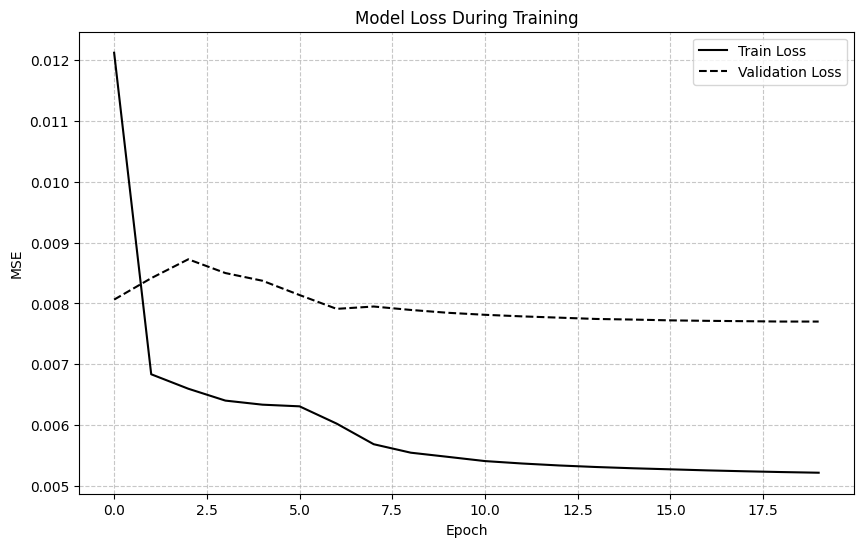


Evaluating model performance...


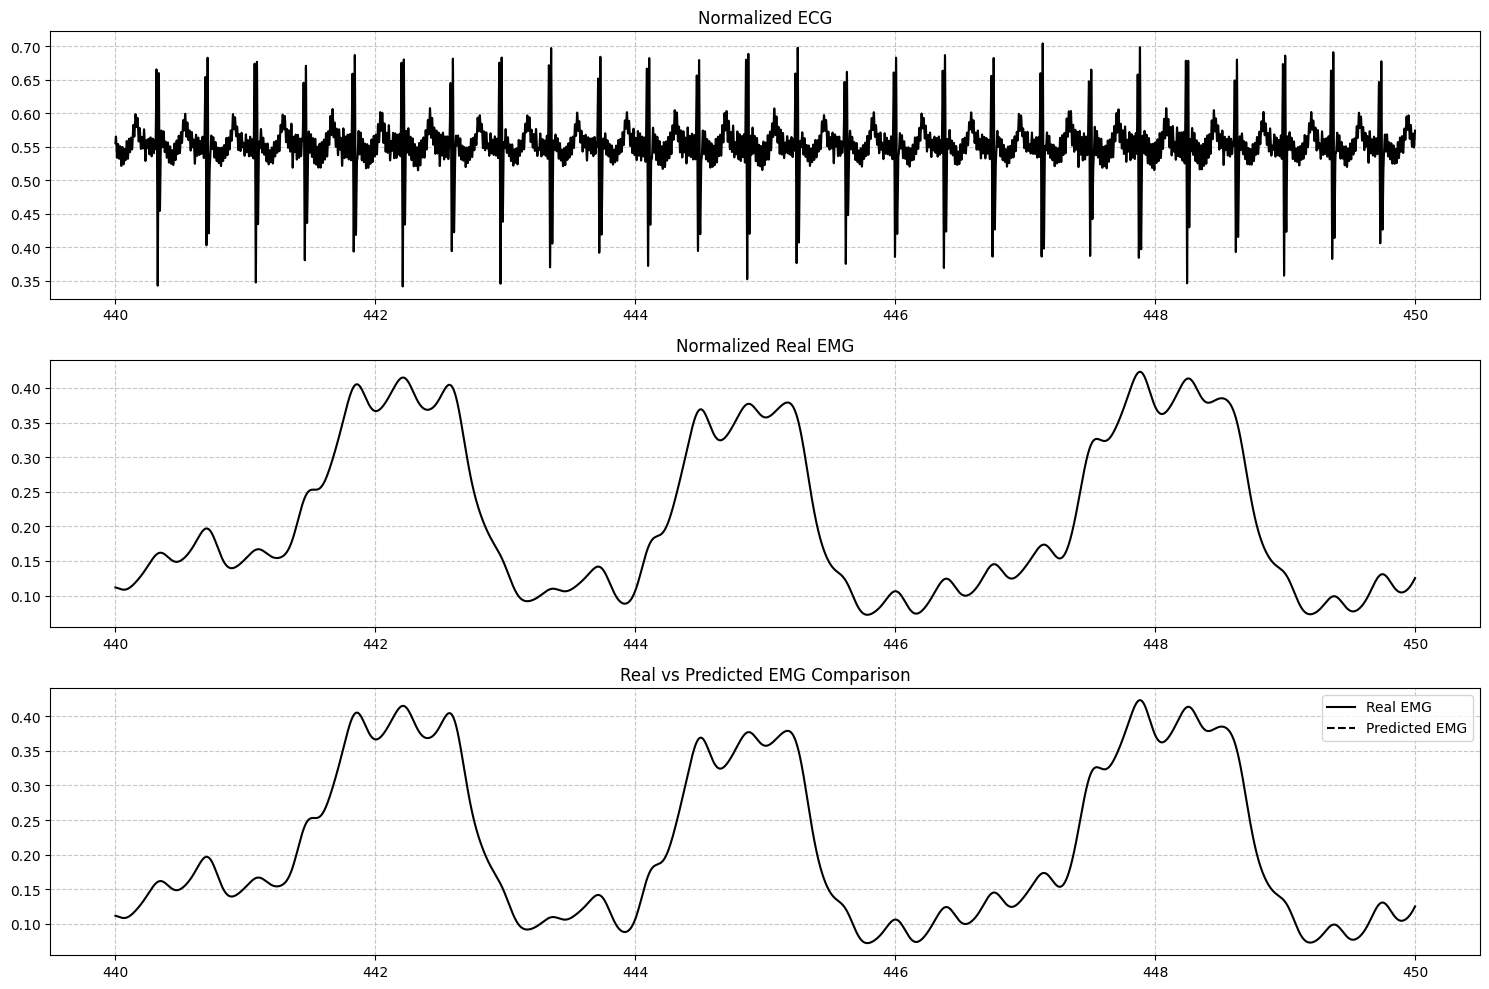


Model saved to ecg_to_emg_hybrid_model.h5

Cleaning up memory...

Process completed successfully!


In [ ]:
import os
import numpy as np
import pandas as pd
import gc  # Garbage collector for memory management

# Set TensorFlow configuration BEFORE importing TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Reduce log messages
os.environ['TF_INTER_OP_PARALLELISM_THREADS'] = '2'
os.environ['TF_INTRA_OP_PARALLELISM_THREADS'] = '2'

# Now import TensorFlow after setting environment variables
import tensorflow as tf

# GPU configuration if available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Rest of imports
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, TimeDistributed, Dense, concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(path):
    """Load data from a binary file and create a DataFrame."""
    with open(path, "rb") as f:
        data = f.read()
    floats = np.frombuffer(data, dtype='<f8')
    samples = floats.reshape(-1, 4)
    df = pd.DataFrame(samples, columns=["SIGNAL", "PICOS", "ENV", "EVENTS"])
    return df

def add_time(df, fs):
    """Add a time column to the DataFrame."""
    df["Time (s)"] = np.arange(len(df)) / fs
    return df

def filter_signal(data, fs, fc, order=4, type='low'):
    """Apply a Butterworth filter."""
    nyq = 0.5 * fs
    normal_fc = fc / nyq
    b, a = butter(order, normal_fc, btype=type, analog=False)
    return filtfilt(b, a, data)

def select_time_range(df, start_sec, end_sec):
    """Select a specific time range from the DataFrame."""
    df_filtered = df[(df["Time (s)"] >= start_sec) & (df["Time (s)"] <= end_sec)].copy().reset_index(drop=True)
    return df_filtered

def normalize_signal(signal):
    """Normalize a signal to the range of 0 to 1."""
    scaler = MinMaxScaler()
    normalized_signal = scaler.fit_transform(signal.values.reshape(-1, 1))
    return normalized_signal.flatten(), scaler

def detect_r_peaks_adaptive(normalized_ecg, fs, std_window=250, std_factor=5, min_distance_ms=50):
    """Detect R peaks by adapting the minimum height."""
    min_distance_samples = int(min_distance_ms * fs / 1000)
    min_height = np.zeros_like(normalized_ecg)
    
    # Optimization: Use block approach to reduce calculations
    block_size = 1000  # Adjust as needed
    n_blocks = len(normalized_ecg) // block_size + 1
    
    for i in range(n_blocks):
        block_start = i * block_size
        block_end = min((i + 1) * block_size, len(normalized_ecg))
        
        # Calculate standard deviation for the whole block at once
        sub_ecg = normalized_ecg[block_start:block_end]
        std_value = np.std(sub_ecg) * std_factor
        min_height[block_start:block_end] = std_value
    
    peaks, _ = find_peaks(normalized_ecg, height=min_height, distance=min_distance_samples)
    return peaks

def verify_r_peaks(time, normalized_ecg, r_peaks):
    """Visualize the normalized ECG signal with detected R peaks."""
    plt.figure(figsize=(15, 6))
    plt.plot(time, normalized_ecg, 'k-', linewidth=1.5, label='Normalized ECG')
    plt.plot(time[r_peaks], normalized_ecg[r_peaks], "ko", label='Detected R Peaks')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Amplitude')
    plt.title('Verification of Detected R Peaks')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def calculate_rr_intervals(r_peaks_time):
    """Calculate RR intervals (in seconds)."""
    rr_intervals = np.diff(r_peaks_time)
    return rr_intervals

def create_hybrid_model_with_past_emg(time_steps, use_smaller_model=True):
    """Create a memory-efficient hybrid CNN-LSTM model."""
    # Input for current ECG window
    input_ecg = Input(shape=(time_steps, 1), name='input_ecg')
    
    if use_smaller_model:
        # Lighter model to save memory
        conv1_ecg = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_ecg)
        lstm_ecg = LSTM(units=64, return_sequences=True)(conv1_ecg)
    else:
        # Original model
        conv1_ecg = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_ecg)
        conv2_ecg = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv1_ecg)
        lstm_ecg = LSTM(units=128, return_sequences=True)(conv2_ecg)

    # Input branch for first past EMG window
    input_emg_past1 = Input(shape=(time_steps, 1), name='input_emg_past1')
    if use_smaller_model:
        conv1_emg1 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(input_emg_past1)
        lstm_emg_past1 = LSTM(units=32, return_sequences=True)(conv1_emg1)
    else:
        conv1_emg1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_emg_past1)
        conv2_emg1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1_emg1)
        lstm_emg_past1 = LSTM(units=64, return_sequences=True)(conv2_emg1)

    # Input branch for second past EMG window
    input_emg_past2 = Input(shape=(time_steps, 1), name='input_emg_past2')
    if use_smaller_model:
        conv1_emg2 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(input_emg_past2)
        lstm_emg_past2 = LSTM(units=32, return_sequences=True)(conv1_emg2)
    else:
        conv1_emg2 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_emg_past2)
        conv2_emg2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1_emg2)
        lstm_emg_past2 = LSTM(units=64, return_sequences=True)(conv2_emg2)

    # Merge branches
    merged = concatenate([lstm_ecg, lstm_emg_past1, lstm_emg_past2])

    # More efficient LSTM layers
    if use_smaller_model:
        lstm_merged = LSTM(units=64, return_sequences=True)(merged)
    else:
        lstm_merged = LSTM(units=128, return_sequences=True)(merged)
        lstm_merged = LSTM(units=128, return_sequences=True)(lstm_merged)

    # Output layer to predict current EMG sequence
    output_emg = TimeDistributed(Dense(units=1, activation='linear'), name='output_emg')(lstm_merged)

    model = Model(inputs=[input_ecg, input_emg_past1, input_emg_past2], outputs=output_emg)
    return model

def process_by_batches(df_filtered, r_peaks_indices, rr_intervals, fs, rr_multiple, n_past_windows, 
                      batch_size=32, max_time_steps=None):
    """Process data in batches to reduce memory usage."""
    if len(r_peaks_indices) <= (1 + n_past_windows - 1):
        print("\nNot enough R peaks detected to create training windows.")
        return None, None, None, None, None, None
    
    ecg_windows = []
    emg_past_windows = [[] for _ in range(n_past_windows)]
    emg_current_windows = []
    window_indices = []
    
    # Process windows in smaller batches
    for i in range(len(r_peaks_indices) - 1 - n_past_windows):
        # Calculate PREVIOUS average RR interval
        previous_avg_rr = np.mean(rr_intervals[i : i + n_past_windows]) if i > 0 else np.mean(rr_intervals[:n_past_windows])
        window_length = int(rr_multiple * previous_avg_rr * fs)
        if window_length <= 0:
            continue
        
        # Define indices for current window
        start_index_current = r_peaks_indices[i + n_past_windows]
        end_index_current = min(start_index_current + window_length, len(df_filtered))
        
        # Extract windows
        ecg_segment = df_filtered['ecg_normalized'].iloc[start_index_current:end_index_current].values
        if len(ecg_segment) == 0:
            continue
            
        emg_segment_current = df_filtered['emg_normalized'].iloc[start_index_current:end_index_current].values
        
        # Extract past EMG windows
        emg_segments_past = []
        for k in range(n_past_windows):
            start_index_past = r_peaks_indices[i + k]
            end_index_past = min(start_index_past + window_length, len(df_filtered))
            emg_segment_past = df_filtered['emg_normalized'].iloc[start_index_past:end_index_past].values
            emg_segments_past.append(emg_segment_past)
        
        # Verify valid data
        if all(len(seg) > 0 for seg in emg_segments_past):
            window_indices.append((start_index_current, end_index_current))
            ecg_windows.append(ecg_segment)
            for k in range(n_past_windows):
                emg_past_windows[k].append(emg_segments_past[k])
            emg_current_windows.append(emg_segment_current)
        
        # Process in batches if we have enough windows
        if len(ecg_windows) >= batch_size:
            break
    
    if not ecg_windows or not emg_current_windows or not all(emg_past_windows):
        print("\nCould not create enough windows with valid data.")
        return None, None, None, None, None, None
    
    # Determine maximum time step size
    if max_time_steps is None:
        TIME_STEPS = max(len(win) for win in ecg_windows + emg_current_windows + [seg for lista in emg_past_windows for seg in lista])
    else:
        TIME_STEPS = min(max_time_steps, 
                         max(len(win) for win in ecg_windows + emg_current_windows + [seg for lista in emg_past_windows for seg in lista]))
    
    # Homogenize length using padding
    ecg_windows_padded = pad_sequences(ecg_windows, maxlen=TIME_STEPS, padding='post', dtype='float32')
    emg_current_windows_padded = pad_sequences(emg_current_windows, maxlen=TIME_STEPS, padding='post', dtype='float32')
    emg_past_windows_padded = [pad_sequences(windows, maxlen=TIME_STEPS, padding='post', dtype='float32') for windows in emg_past_windows]
    
    # Reshape for the model
    X_ecg = np.expand_dims(ecg_windows_padded, axis=-1)
    X_emg_past = [np.expand_dims(windows, axis=-1) for windows in emg_past_windows_padded]
    y_emg_current = np.expand_dims(emg_current_windows_padded, axis=-1)
    
    return X_ecg, X_emg_past, y_emg_current, window_indices, TIME_STEPS, df_filtered

def train_model_by_batches(df_filtered, r_peaks_indices, rr_intervals, fs, rr_multiple, n_past_windows, 
                         max_time_steps=500, batch_size=16, epochs=20, use_smaller_model=True):
    """Train the model by processing data in batches to reduce memory usage."""
    # Create and compile model once
    TIME_STEPS = max_time_steps  # Use fixed value or determined by first batches
    model = create_hybrid_model_with_past_emg(TIME_STEPS, use_smaller_model)
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    
    # Split training/test data
    indices = np.arange(len(r_peaks_indices) - 1 - n_past_windows)
    train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=42, shuffle=False)
    
    # Train by batches
    history_loss = []
    history_val_loss = []
    
    # Training loop by epochs
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        epoch_loss = []
        
        # Training batches
        for batch_start in range(0, len(train_indices), batch_size):
            batch_indices = train_indices[batch_start:batch_start + batch_size]
            
            # Create windows only for this batch
            batch_peaks_indices = [r_peaks_indices[i:i+n_past_windows+1] for i in batch_indices]
            batch_rr = [rr_intervals[i:i+n_past_windows] for i in batch_indices if i+n_past_windows <= len(rr_intervals)]
            
            # Process this specific batch
            X_ecg, X_emg_past, y, window_indices, _, _ = process_windows_batch(
                df_filtered, batch_peaks_indices, batch_rr, fs, rr_multiple, n_past_windows, TIME_STEPS)
            
            if X_ecg is not None:
                # Train with this batch
                history = model.fit(
                    [X_ecg] + X_emg_past,
                    y,
                    epochs=1,
                    batch_size=batch_size,
                    verbose=0
                )
                epoch_loss.append(history.history['loss'][0])
                
                # Clean memory
                del X_ecg, X_emg_past, y, window_indices
                gc.collect()
        
        # Average loss for this epoch
        avg_loss = np.mean(epoch_loss) if epoch_loss else 0
        history_loss.append(avg_loss)
        print(f"  Loss: {avg_loss:.4f}")
        
        # Validation on test set (a sample to evaluate)
        val_losses = []
        for batch_start in range(0, len(test_indices), batch_size):
            batch_indices = test_indices[batch_start:batch_start + batch_size]
            
            # Create windows only for this validation batch
            batch_peaks_indices = [r_peaks_indices[i:i+n_past_windows+1] for i in batch_indices]
            batch_rr = [rr_intervals[i:i+n_past_windows] for i in batch_indices if i+n_past_windows <= len(rr_intervals)]
            
            X_ecg_val, X_emg_past_val, y_val, _, _, _ = process_windows_batch(
                df_filtered, batch_peaks_indices, batch_rr, fs, rr_multiple, n_past_windows, TIME_STEPS)
            
            if X_ecg_val is not None:
                val_loss = model.evaluate([X_ecg_val] + X_emg_past_val, y_val, verbose=0)
                val_losses.append(val_loss)
                
                # Clean memory
                del X_ecg_val, X_emg_past_val, y_val
                gc.collect()
        
        avg_val_loss = np.mean(val_losses) if val_losses else 0
        history_val_loss.append(avg_val_loss)
        print(f"  Val Loss: {avg_val_loss:.4f}")
    
    # Visualize loss during training
    plt.figure(figsize=(10, 6))
    plt.plot(history_loss, 'k-', label='Train Loss', linewidth=1.5)
    plt.plot(history_val_loss, 'k--', label='Validation Loss', linewidth=1.5)
    plt.title('Model Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    return model, TIME_STEPS

def process_windows_batch(df_filtered, batch_peaks_indices, batch_rr, fs, rr_multiple, n_past_windows, TIME_STEPS):
    """Process a specific batch of windows."""
    ecg_windows = []
    emg_past_windows = [[] for _ in range(n_past_windows)]
    emg_current_windows = []
    window_indices = []
    
    for i, peaks_indices in enumerate(batch_peaks_indices):
        # Ensure there are enough peaks to process
        if len(peaks_indices) <= n_past_windows:
            continue
        
        # Check if there is enough RR data for this index
        if i >= len(batch_rr):
            continue
            
        rrs = batch_rr[i]
        
        # Calculate window length
        if len(rrs) > 0:  # Check that rrs is not empty
            avg_rr = np.mean(rrs)
        else:
            avg_rr = 0.8  # Default value
            
        window_length = int(rr_multiple * avg_rr * fs)
        if window_length <= 0:
            continue
            
        # Indices for current window
        start_index_current = peaks_indices[-1]
        end_index_current = min(start_index_current + window_length, len(df_filtered))
        
        # Extract windows
        if end_index_current <= len(df_filtered):
            ecg_segment = df_filtered['ecg_normalized'].iloc[start_index_current:end_index_current].values
            emg_segment_current = df_filtered['emg_normalized'].iloc[start_index_current:end_index_current].values
            
            # Extract past EMG windows
            emg_segments_past = []
            valid_segments = True
            
            for k in range(n_past_windows):
                if k >= len(peaks_indices) - 1:  # Ensure there are enough indices
                    valid_segments = False
                    break
                    
                start_index_past = peaks_indices[k]
                end_index_past = min(start_index_past + window_length, len(df_filtered))
                
                if start_index_past >= len(df_filtered) or end_index_past > len(df_filtered):
                    valid_segments = False
                    break
                    
                emg_segment_past = df_filtered['emg_normalized'].iloc[start_index_past:end_index_past].values
                emg_segments_past.append(emg_segment_past)
            
            # Add if all segments are valid and not empty
            if valid_segments and len(ecg_segment) > 0:
                window_indices.append((start_index_current, end_index_current))
                ecg_windows.append(ecg_segment)
                emg_current_windows.append(emg_segment_current)
                
                for k in range(n_past_windows):
                    if k < len(emg_segments_past):
                        emg_past_windows[k].append(emg_segments_past[k])
    
    # Check if we have enough data
    if not ecg_windows:
        return None, None, None, None, None, None
    
    # Check that all past window lists have data
    all_past_have_data = all(len(windows) > 0 for windows in emg_past_windows)
    if not all_past_have_data:
        return None, None, None, None, None, None
    
    # Homogenize length
    ecg_windows_padded = pad_sequences(ecg_windows, maxlen=TIME_STEPS, padding='post', dtype='float32')
    emg_current_windows_padded = pad_sequences(emg_current_windows, maxlen=TIME_STEPS, padding='post', dtype='float32')
    emg_past_windows_padded = [pad_sequences(windows, maxlen=TIME_STEPS, padding='post', dtype='float32') for windows in emg_past_windows]
    
    # Reshape for the model
    X_ecg = np.expand_dims(ecg_windows_padded, axis=-1)
    X_emg_past = [np.expand_dims(windows, axis=-1) for windows in emg_past_windows_padded]
    y_emg_current = np.expand_dims(emg_current_windows_padded, axis=-1)
    
    return X_ecg, X_emg_past, y_emg_current, window_indices, TIME_STEPS, df_filtered

def evaluate_model(model, df_filtered, r_peaks_indices, r_peaks_time, rr_intervals, fs, rr_multiple, n_past_windows, TIME_STEPS):
    """Evaluate the model by generating predictions and visualizations."""
    # Generate predictions only for a manageable portion of data
    max_eval_samples = 50  # Limit number of evaluation samples
    eval_indices = np.arange(len(r_peaks_indices) - 1 - n_past_windows)
    eval_indices = eval_indices[:max_eval_samples]
    
    # Create DataFrames to store results
    results_df = df_filtered.copy()
    results_df['predicted_emg'] = np.nan
    
    for i in eval_indices:
        if i >= len(rr_intervals) or i + n_past_windows >= len(r_peaks_indices):
            continue
            
        # Calculations for this specific window
        previous_avg_rr = np.mean(rr_intervals[i:i+n_past_windows])
        window_length = int(rr_multiple * previous_avg_rr * fs)
        
        if window_length <= 0:
            continue
            
        # Indices for current window
        start_index_current = r_peaks_indices[i + n_past_windows]
        end_index_current = min(start_index_current + window_length, len(df_filtered))
        
        # Extract windows
        ecg_segment = df_filtered['ecg_normalized'].iloc[start_index_current:end_index_current].values
        
        # Extract past EMG windows
        emg_segments_past = []
        for k in range(n_past_windows):
            start_index_past = r_peaks_indices[i + k]
            end_index_past = min(start_index_past + window_length, len(df_filtered))
            emg_segment_past = df_filtered['emg_normalized'].iloc[start_index_past:end_index_past].values
            emg_segments_past.append(emg_segment_past)
        
        # Prepare data for prediction
        ecg_padded = pad_sequences([ecg_segment], maxlen=TIME_STEPS, padding='post', dtype='float32')
        emg_past_padded = [pad_sequences([seg], maxlen=TIME_STEPS, padding='post', dtype='float32') for seg in emg_segments_past]
        
        X_ecg = np.expand_dims(ecg_padded, axis=-1)
        X_emg_past = [np.expand_dims(windows, axis=-1) for windows in emg_past_padded]
        
        # Prediction
        pred = model.predict([X_ecg] + X_emg_past, verbose=0)
        pred_values = pred[0].flatten()[:end_index_current - start_index_current]
        
        # Save prediction
        if start_index_current + len(pred_values) <= len(results_df):
            results_df.loc[start_index_current:start_index_current+len(pred_values)-1, 'predicted_emg'] = pred_values
    
    # Visualizations
    # 1. Visualize a segment of the time series
    vis_start_time = results_df['Time (s)'].min() + (results_df['Time (s)'].max() - results_df['Time (s)'].min()) * 0.6
    vis_end_time = vis_start_time + 10  # Show 10 seconds
    
    vis_df = results_df[(results_df['Time (s)'] >= vis_start_time) & 
                      (results_df['Time (s)'] <= vis_end_time)]
    
    plt.figure(figsize=(15, 10))
    
    # Plot 1: ECG
    plt.subplot(3, 1, 1)
    plt.plot(vis_df['Time (s)'], vis_df['ecg_normalized'], 'k-', linewidth=1.5)
    plt.title('Normalized ECG')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Plot 2: Real EMG
    plt.subplot(3, 1, 2)
    plt.plot(vis_df['Time (s)'], vis_df['emg_normalized'], 'k-', linewidth=1.5)
    plt.title('Normalized Real EMG')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Plot 3: Predicted vs real EMG
    plt.subplot(3, 1, 3)
    plt.plot(vis_df['Time (s)'], vis_df['emg_normalized'], 'k-', label='Real EMG', linewidth=1.5)
    plt.plot(vis_df['Time (s)'], vis_df['predicted_emg'], 'k--', label='Predicted EMG', linewidth=1.5)
    plt.title('Real vs Predicted EMG Comparison')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return results_df

# --- Main execution ---
if __name__ == "__main__":
    # Define parameters
    path = "P/P1e.dat"
    fs = 1024
    start_sec = 50
    end_sec = 700  # You can increase this value to train with more data
    fc_ecg = 80.0
    fc_emg = 5.0
    filter_order = 4
    r_peak_std_window = 500
    r_peak_std_factor = 8
    r_peak_min_distance_ms = 200
    n_past_windows = 2
    rr_multiple = 2
    
    # Training parameters adjusted for lower memory consumption
    batch_size = 8  # Small batch size to use less memory
    epochs = 20
    max_time_steps = 500  # Limit maximum sequence size
    use_smaller_model = True  # Use smaller model
    
    print("Loading and preparing data...")
    # Load, add time, filter, and normalize
    df_complete = load_data(path)
    df_complete = add_time(df_complete, fs)
    df_filtered = select_time_range(df_complete, start_sec, end_sec)
    
    # Extract relevant signals
    ecg_signal = df_filtered["SIGNAL"].values
    emg_signal = df_filtered["ENV"].values
    
    # Filter signals
    print("Filtering signals...")
    filtered_ecg = filter_signal(ecg_signal, fs, fc_ecg, filter_order, 'low')
    filtered_emg = filter_signal(emg_signal, fs, fc_emg, filter_order, 'low')
    
    # Normalize signals
    print("Normalizing signals...")
    ecg_normalized, _ = normalize_signal(pd.Series(filtered_ecg))
    emg_normalized, _ = normalize_signal(pd.Series(filtered_emg))
    
    # Add normalized signals to DataFrame
    df_filtered['filtered_ecg'] = filtered_ecg
    df_filtered['filtered_emg'] = filtered_emg
    df_filtered['ecg_normalized'] = ecg_normalized
    df_filtered['emg_normalized'] = emg_normalized
    
   # Detect R peaks in ECG
    print("Detecting R peaks...")
    r_peaks_indices = detect_r_peaks_adaptive(
        ecg_normalized, fs, r_peak_std_window, r_peak_std_factor, r_peak_min_distance_ms)
    
    # Verify detected R peaks
    time = df_filtered["Time (s)"].values
    print(f"{len(r_peaks_indices)} R peaks detected.")
    verify_r_peaks(time, ecg_normalized, r_peaks_indices)
    
    # Get times and RR intervals
    r_peaks_time = time[r_peaks_indices]
    rr_intervals = calculate_rr_intervals(r_peaks_time)
    print(f"Average RR interval: {np.mean(rr_intervals):.4f} seconds.")
    
    # Check if there is enough data to train
    if len(r_peaks_indices) <= (1 + n_past_windows):
        print("Not enough R peaks detected to create training windows.")
    else:
        # Train model
        print("\nTraining model in batches to save memory...")
        try:
            model, TIME_STEPS = train_model_by_batches(
                df_filtered, r_peaks_indices, rr_intervals, fs, rr_multiple, n_past_windows,
                max_time_steps=max_time_steps, batch_size=batch_size, epochs=epochs, use_smaller_model=use_smaller_model)

            # Evaluate model performance
            print("\nEvaluating model performance...")
            results_df = evaluate_model(model, df_filtered, r_peaks_indices, r_peaks_time, 
                                      rr_intervals, fs, rr_multiple, n_past_windows, TIME_STEPS)

            # Save the model
            model_save_path = "ecg_to_emg_hybrid_model.h5"
            model.save(model_save_path)
            print(f"\nModel saved to {model_save_path}")

            # Clean up to free memory
            print("\nCleaning up memory...")
            del model
            gc.collect()

            print("\nProcess completed successfully!")
        except Exception as e:
            print(f"\nError during model training or evaluation: {e}")
            import traceback
            traceback.print_exc()


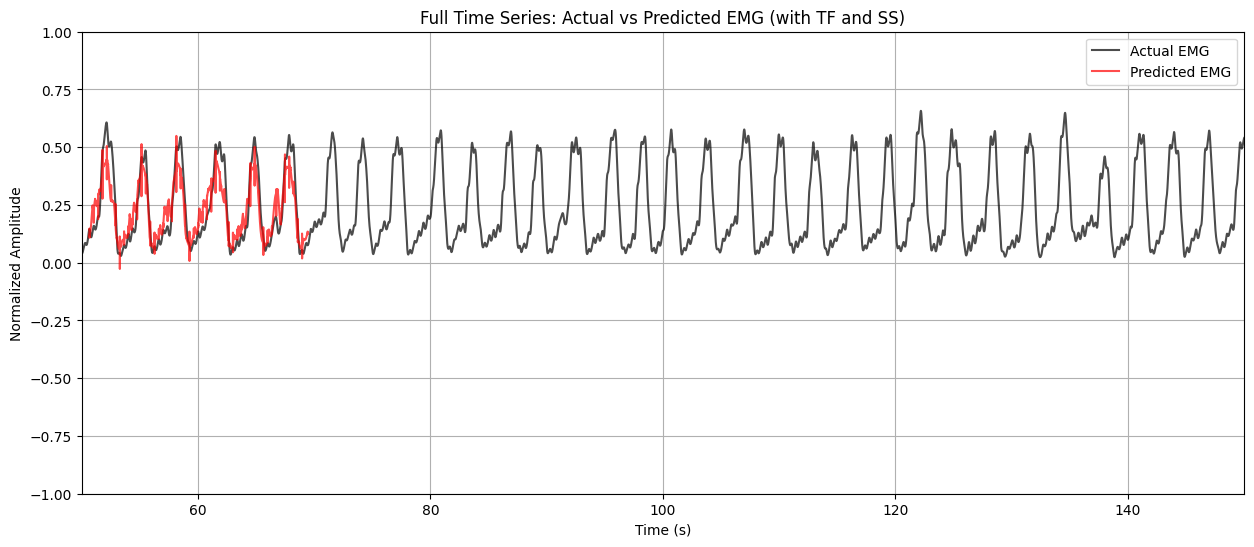

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(results_df['Time (s)'], results_df['emg_normalized'], 'k-', label='Actual EMG', alpha=0.7)
plt.plot(results_df['Time (s)'], results_df['predicted_emg'], 'r', label='Predicted EMG', alpha=0.7)
plt.title('Full Time Series: Actual vs Predicted EMG (with TF and SS)')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Amplitude')
plt.grid(True)
plt.legend()

# Límites de los ejes (ajústalos a lo que necesites)
plt.xlim(50, 150)
plt.ylim(-1, 1)

plt.show()


Starting prediction process...
Attempting to load model from: C:\Users\ACER\Documents\Tesis\NN\modelo_ecg_emg_hibrido.h5


Model successfully loaded from: C:\Users\ACER\Documents\Tesis\NN\modelo_ecg_emg_hibrido.h5
Model TIME_STEPS: 500
Loading and preprocessing data...
Filtering signals...
Normalizing signals...
Detecting R peaks...
107 R peaks detected.


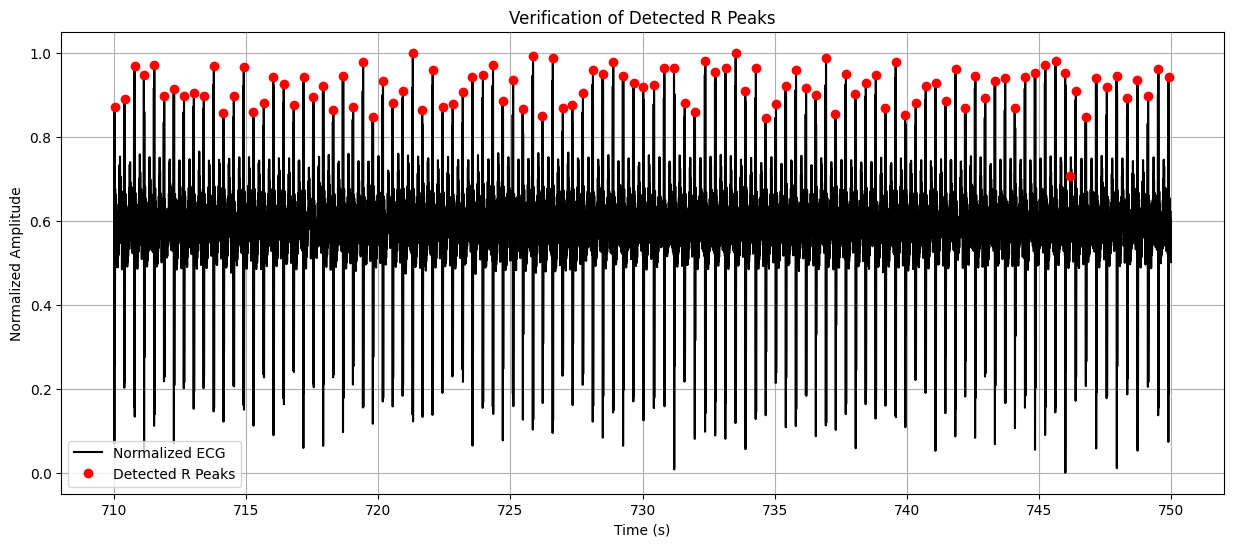

Average RR interval: 0.3763 seconds.
Making predictions...
Applying post-processing to the predicted EMG signal...
Applying low-pass filter to smooth the predicted EMG signal (before visualization)...
Visualizing results...


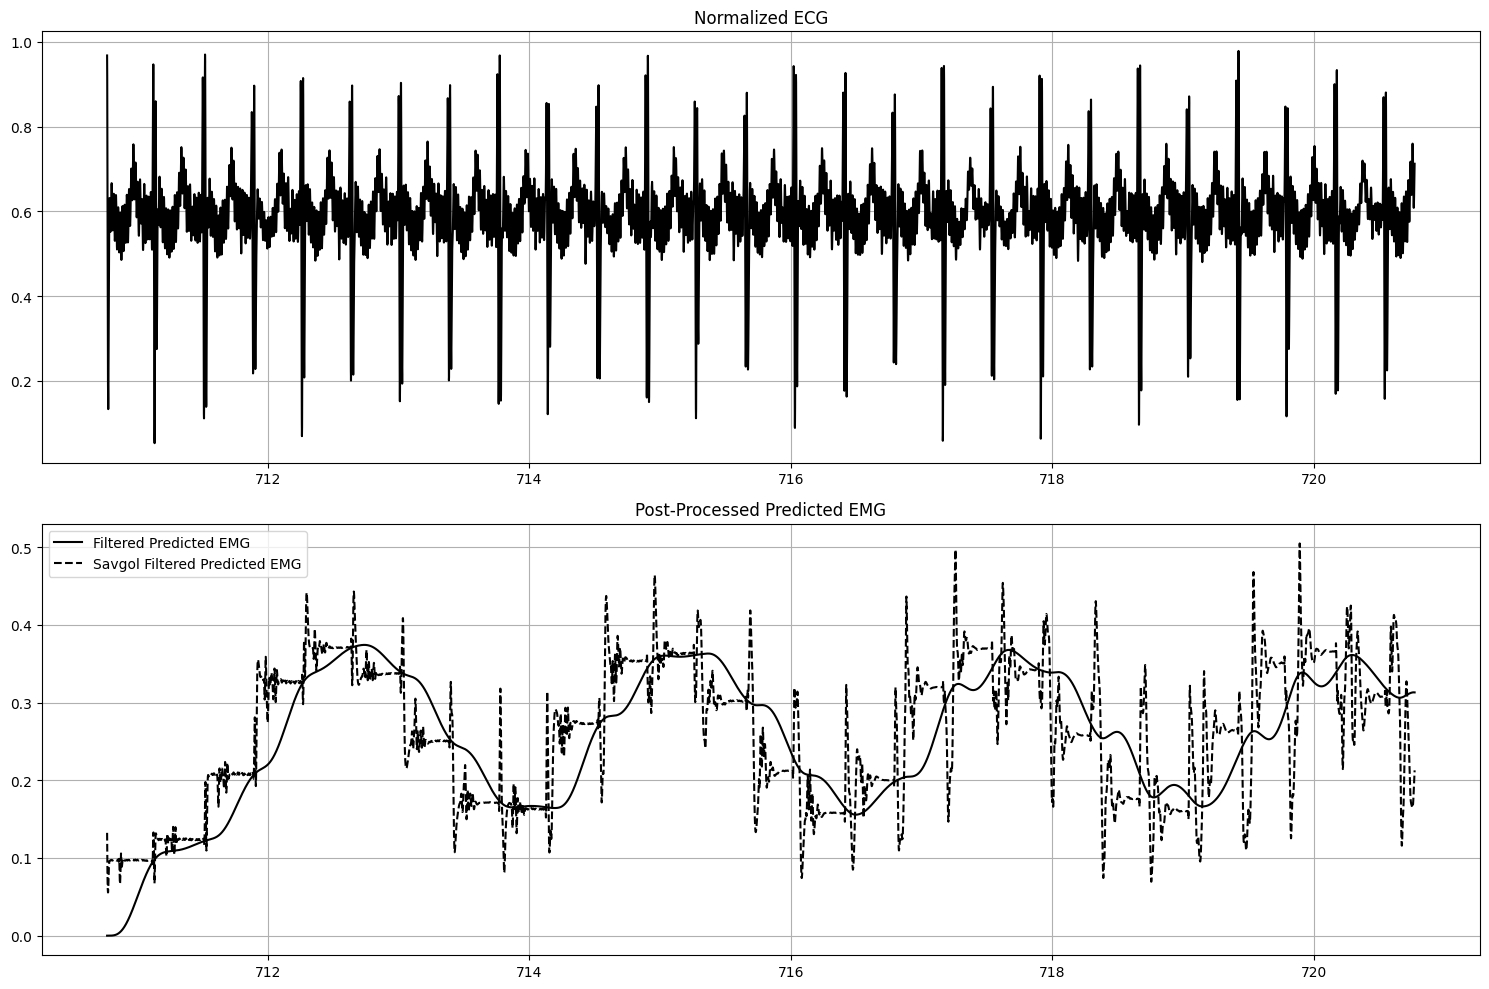

Saving results to CSV...


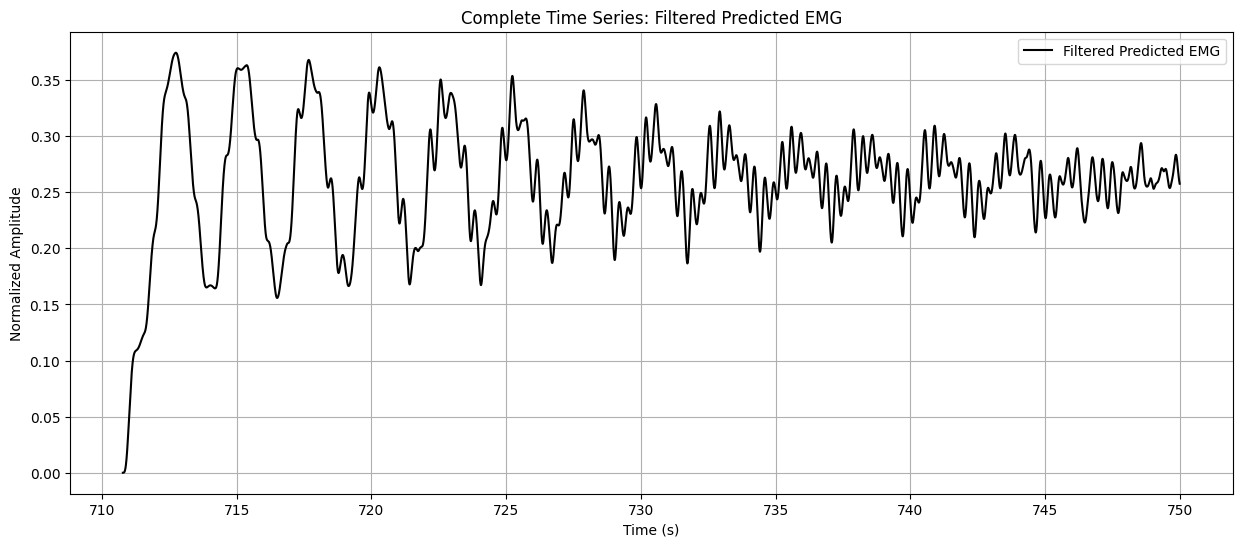

Process finished.


In [ ]:
import os
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks, lfilter
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from scipy.signal import savgol_filter

# TensorFlow configuration
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_INTER_OP_PARALLELISM_THREADS'] = '2'
os.environ['TF_INTRA_OP_PARALLELISM_THREADS'] = '2'

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# --- Parameters (adjustable for post-processing) ---
fs = 1024
fc_ecg = 80.0
fc_emg = 5.0
orden_filtro = 4
ventana_std_pico_r = 500
factor_std_pico_r = 8
distancia_minima_pico_r_ms = 200
n_ventanas_pasadas = 2
multiplo_rr = 2
ruta_modelo = "modelo_ecg_emg_hibrido.h5"
ruta_dato = "P/P1e.dat"
inicio_seg_nuevo = 710
fin_seg_nuevo = 750
valor_inicial_emg = 0.0

# Parameters for Savitzky-Golay filter
ventana_savgol = 15
orden_savgol = 3

# --- Preprocessing functions (unchanged) ---
def cargar_datos(path):
    try:
        with open(path, "rb") as f:
            data = f.read()
        floats = np.frombuffer(data, dtype='<f8')
        samples = floats.reshape(-1, 4)
        df = pd.DataFrame(samples, columns=["SIGNAL", "PICOS", "ENV", "EVENTS"])
        return df
    except Exception as e:
        print(f"Error loading data from {path}: {e}")
        sys.exit(1)

def agregar_tiempo(df, fs):
    df["Time (s)"] = np.arange(len(df)) / fs  # Changed to English
    return df

def filtrar_senal(data, fs, fc, orden=4, tipo='low'):
    nyq = 0.5 * fs
    normal_fc = fc / nyq
    b, a = butter(orden, normal_fc, btype=tipo, analog=False)
    return filtfilt(b, a, data)

def butter_lowpass_filter(data, cutoff_freq, sampling_rate, order=4):
    nyquist_freq = 0.5 * sampling_rate
    normalized_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normalized_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

def seleccionar_rango_tiempo(df, inicio_seg, fin_seg):
    df_filtrado = df[(df["Time (s)"] >= inicio_seg) & (df["Time (s)"] <= fin_seg)].copy().reset_index(drop=True)
    return df_filtrado

def normalizar_senal(senal, scaler=None):
    if scaler is None:
        scaler = MinMaxScaler()
        senal_normalizada = scaler.fit_transform(senal.values.reshape(-1, 1))
        return senal_normalizada.flatten(), scaler
    else:
        senal_normalizada = scaler.transform(senal.values.reshape(-1, 1))
        return senal_normalizada.flatten(), scaler

def detectar_picos_r_adaptativo(ecg_normalizado, fs, ventana_std=250, factor_std=5, distancia_minima_ms=50):
    distancia_minima_muestras = int(distancia_minima_ms * fs / 1000)
    altura_minima = np.zeros_like(ecg_normalizado)

    bloque_size = 1000
    n_bloques = len(ecg_normalizado) // bloque_size + 1

    for i in range(n_bloques):
        inicio_bloque = i * bloque_size
        fin_bloque = min((i + 1) * bloque_size, len(ecg_normalizado))

        sub_ecg = ecg_normalizado[inicio_bloque:fin_bloque]
        std_valor = np.std(sub_ecg) * factor_std
        altura_minima[inicio_bloque:fin_bloque] = std_valor

    peaks, _ = find_peaks(ecg_normalizado, height=altura_minima, distance=distancia_minima_muestras)
    return peaks

def calcular_rr_intervals(tiempo_picos_r):
    rr_intervals = np.diff(tiempo_picos_r)
    return rr_intervals

def visualizar_picos_r(tiempo, ecg_normalizado, picos_r):
    plt.figure(figsize=(15, 6))
    plt.plot(tiempo, ecg_normalizado, 'k-', label='Normalized ECG')  # Changed to black line
    plt.plot(tiempo[picos_r], ecg_normalizado[picos_r], "ro", label='Detected R Peaks')  # Keep red dots for R peaks
    plt.xlabel('Time (s)')  # Changed to English
    plt.ylabel('Normalized Amplitude')  # Changed to English
    plt.title('Verification of Detected R Peaks')  # Changed to English
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Main prediction function with post-processing ---
def predecir_emg_desde_ecg(modelo, df_datos, picos_r_indices, rr_intervals, fs, multiplo_rr, n_ventanas_pasadas, TIME_STEPS):
    if modelo is None:
        print("ERROR: Model is not loaded correctly")
        sys.exit(1)

    df_resultados = df_datos.copy()
    df_resultados['emg_predicho'] = np.nan

    historial_emg_pasado = [np.zeros((1, TIME_STEPS, 1), dtype='float32') for _ in range(n_ventanas_pasadas)]

    if len(picos_r_indices) <= n_ventanas_pasadas:
        print(f"Not enough R peaks detected (at least {n_ventanas_pasadas+1} needed)")
        return df_resultados

    for i in range(len(picos_r_indices) - n_ventanas_pasadas):
        inicio_rr = max(0, i)
        fin_rr = min(len(rr_intervals), i + n_ventanas_pasadas)

        if fin_rr <= inicio_rr:
            continue

        rr_promedio = np.mean(rr_intervals[inicio_rr:fin_rr])
        longitud_ventana = int(multiplo_rr * rr_promedio * fs)

        if longitud_ventana <= 0:
            continue

        start_index_actual = picos_r_indices[i + n_ventanas_pasadas]
        end_index_actual = min(start_index_actual + longitud_ventana, len(df_datos))

        ecg_segment = df_datos['ecg_normalizado'].iloc[start_index_actual:end_index_actual].values
        ecg_padded = pad_sequences([ecg_segment], maxlen=TIME_STEPS, padding='post', dtype='float32')
        X_ecg = np.expand_dims(ecg_padded, axis=-1)

        try:
            prediccion = modelo.predict([X_ecg] + historial_emg_pasado, verbose=0)
            valores_pred = prediccion[0].flatten()[:end_index_actual - start_index_actual]

            if start_index_actual + len(valores_pred) <= len(df_resultados):
                df_resultados.loc[start_index_actual:start_index_actual+len(valores_pred)-1, 'emg_predicho'] = valores_pred

            emg_padded_pred = pad_sequences([valores_pred], maxlen=TIME_STEPS, padding='post', dtype='float32')
            historial_emg_pasado.append(np.expand_dims(emg_padded_pred, axis=-1))
            historial_emg_pasado = historial_emg_pasado[-n_ventanas_pasadas:]

        except Exception as e:
            print(f"Error during prediction: {e}")
            continue

    return df_resultados

# --- Function to apply post-processing ---
def post_procesar_emg(df_resultados, fs, ventana_savgol, orden_savgol):
    """Applies post-processing techniques to the predicted EMG signal."""
    emg_predicho = df_resultados['emg_predicho'].dropna().values

    # 1. Savitzky-Golay filter for smoothing
    try:
        emg_suavizado_savgol = savgol_filter(emg_predicho, ventana_savgol, orden_savgol)
        df_resultados.loc[df_resultados['emg_predicho'].notna(), 'emg_predicho_suavizado_savgol'] = emg_suavizado_savgol
    except Exception as e:
        print(f"Error applying Savitzky-Golay filter: {e}")
        df_resultados['emg_predicho_suavizado_savgol'] = np.nan

    return df_resultados

# --- Main program (with post-processing) ---
if __name__ == "__main__":
    print("Starting prediction process...")

    if not os.path.exists(ruta_modelo):
        print(f"ERROR: Model file does not exist at path: {ruta_modelo}")
        sys.exit(1)

    modelo_cargado = None
    try:
        print(f"Attempting to load model from: {ruta_modelo}")
        modelo_cargado = load_model(ruta_modelo, custom_objects={'mse': MeanSquaredError})
        print(f"Model successfully loaded from: {ruta_modelo}")
        TIME_STEPS = modelo_cargado.input[0].shape[1]
        print(f"Model TIME_STEPS: {TIME_STEPS}")
    except Exception as e:
        print(f"CRITICAL ERROR loading model: {e}")
        import traceback
        traceback.print_exc()
        sys.exit(1)

    if not os.path.exists(ruta_dato):
        print(f"ERROR: Data file does not exist at path: {ruta_dato}")
        sys.exit(1)

    print("Loading and preprocessing data...")
    df_nuevo = cargar_datos(ruta_dato)
    df_nuevo = agregar_tiempo(df_nuevo, fs)
    df_nuevo_filtrado = seleccionar_rango_tiempo(df_nuevo, inicio_seg_nuevo, fin_seg_nuevo)

    print("Filtering signals...")
    senal_ecg = df_nuevo_filtrado["SIGNAL"].values
    ecg_filtrado = filtrar_senal(senal_ecg, fs, fc_ecg, orden_filtro, 'low')

    print("Normalizing signals...")
    ecg_normalizado, _ = normalizar_senal(pd.Series(ecg_filtrado))

    df_nuevo_filtrado['ecg_filtrado'] = ecg_filtrado
    df_nuevo_filtrado['ecg_normalizado'] = ecg_normalizado

    print("Detecting R peaks...")
    picos_r_indices = detectar_picos_r_adaptativo(
        ecg_normalizado, fs, ventana_std_pico_r, factor_std_pico_r, distancia_minima_pico_r_ms)

    tiempo = df_nuevo_filtrado["Time (s)"].values
    print(f"{len(picos_r_indices)} R peaks detected.")
    visualizar_picos_r(tiempo, ecg_normalizado, picos_r_indices)

    tiempo_picos_r = tiempo[picos_r_indices]
    rr_intervals = calcular_rr_intervals(tiempo_picos_r)
    print(f"Average RR interval: {np.mean(rr_intervals):.4f} seconds.")

    print("Making predictions...")
    if modelo_cargado is None:
        print("ERROR: The model was not loaded correctly before prediction")
        sys.exit(1)

    df_resultados = predecir_emg_desde_ecg(
        modelo_cargado, df_nuevo_filtrado, picos_r_indices, rr_intervals,
        fs, multiplo_rr, n_ventanas_pasadas, TIME_STEPS)

    # Apply post-processing to the predicted EMG signal
    print("Applying post-processing to the predicted EMG signal...")
    df_resultados = post_procesar_emg(df_resultados, fs, ventana_savgol, orden_savgol)

    print("Applying low-pass filter to smooth the predicted EMG signal (before visualization)...")
    emg_predicho_valores = df_resultados['emg_predicho'].dropna().values
    cutoff_frecuencia_emg = 2.0
    emg_filtrado = butter_lowpass_filter(emg_predicho_valores, cutoff_frecuencia_emg, fs, order=4)

    indices_no_nulos = df_resultados.index[df_resultados['emg_predicho'].notna()]
    if len(indices_no_nulos) > 0 and len(emg_filtrado) > 0:
        df_resultados.loc[indices_no_nulos[:len(emg_filtrado)], 'emg_predicho_filtrado'] = emg_filtrado

    print("Visualizing results...")
    indices_con_prediccion = df_resultados.index[df_resultados['emg_predicho'].notna()]
    if len(indices_con_prediccion) > 0:
        inicio_vis = df_resultados.loc[indices_con_prediccion[0], 'Time (s)']
        fin_vis = inicio_vis + 10

        df_vis = df_resultados[(df_resultados['Time (s)'] >= inicio_vis) &
                              (df_resultados['Time (s)'] <= fin_vis)]

        plt.figure(figsize=(15, 10))

        plt.subplot(2, 1, 1)
        plt.plot(df_vis['Time (s)'], df_vis['ecg_normalizado'], 'k-')  # Changed to black line
        plt.title('Normalized ECG')  # Changed to English
        plt.grid(True)

        plt.subplot(2, 1, 2)
        # Only show the filtered EMG signal
        if 'emg_predicho_filtrado' in df_vis.columns:
            plt.plot(df_vis['Time (s)'], df_vis['emg_predicho_filtrado'], 'k-', label='Filtered Predicted EMG')  # Changed to black line
        if 'emg_predicho_suavizado_savgol' in df_vis.columns:
            plt.plot(df_vis['Time (s)'], df_vis['emg_predicho_suavizado_savgol'], 'k--', label='Savgol Filtered Predicted EMG')  # Changed to black line
        plt.title('Post-Processed Predicted EMG')  # Changed to English
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

        print("Saving results to CSV...")
        df_resultados.to_csv('resultados_prediccion_nuevos_datos_postproc.csv', index=False)

        plt.figure(figsize=(15, 6))
        # Only show the filtered EMG signal in the final graph
        if 'emg_predicho_filtrado' in df_resultados.columns:
            plt.plot(df_resultados['Time (s)'], df_resultados['emg_predicho_filtrado'], 'k-', label='Filtered Predicted EMG')  # Changed to black line
        plt.title('Complete Time Series: Filtered Predicted EMG')  # Changed to English
        plt.xlabel('Time (s)')  # Changed to English
        plt.ylabel('Normalized Amplitude')  # Changed to English
        plt.grid(True)
        plt.legend()
        plt.savefig('emg_predicho_filtrado_completo.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("No valid predictions were generated.")
    print("Process finished.")

Iniciando el proceso de predicción...
Intentando cargar el modelo desde: C:\Users\ACER\Documents\Tesis\NN\modelo_ecg_emg_hibrido_tf_ss.h5


Modelo cargado exitosamente desde: C:\Users\ACER\Documents\Tesis\NN\modelo_ecg_emg_hibrido_tf_ss.h5
TIME_STEPS del modelo: 500
Cargando y preprocesando datos...
Filtrando señales...
Normalizando señales...
Detectando picos R...
Se detectaron 107 picos R.


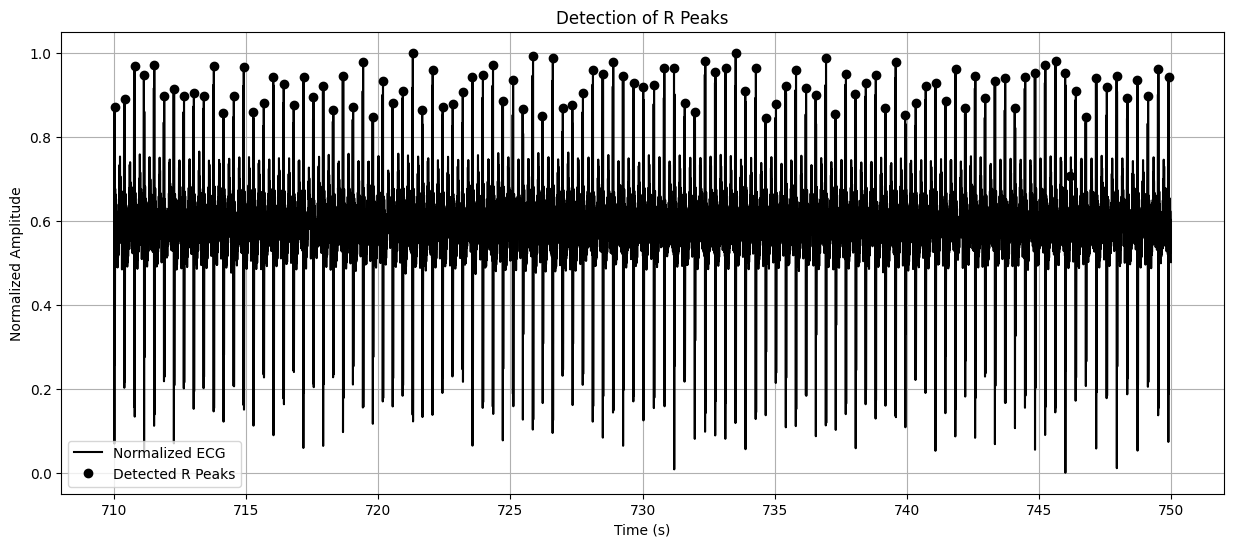

Intervalo RR promedio: 0.3763 segundos.
Realizando predicciones...
Aplicando post-procesamiento a la señal EMG predicha...
Aplicando filtro pasabajos para suavizar la señal EMG predicha...
Visualizando resultados...


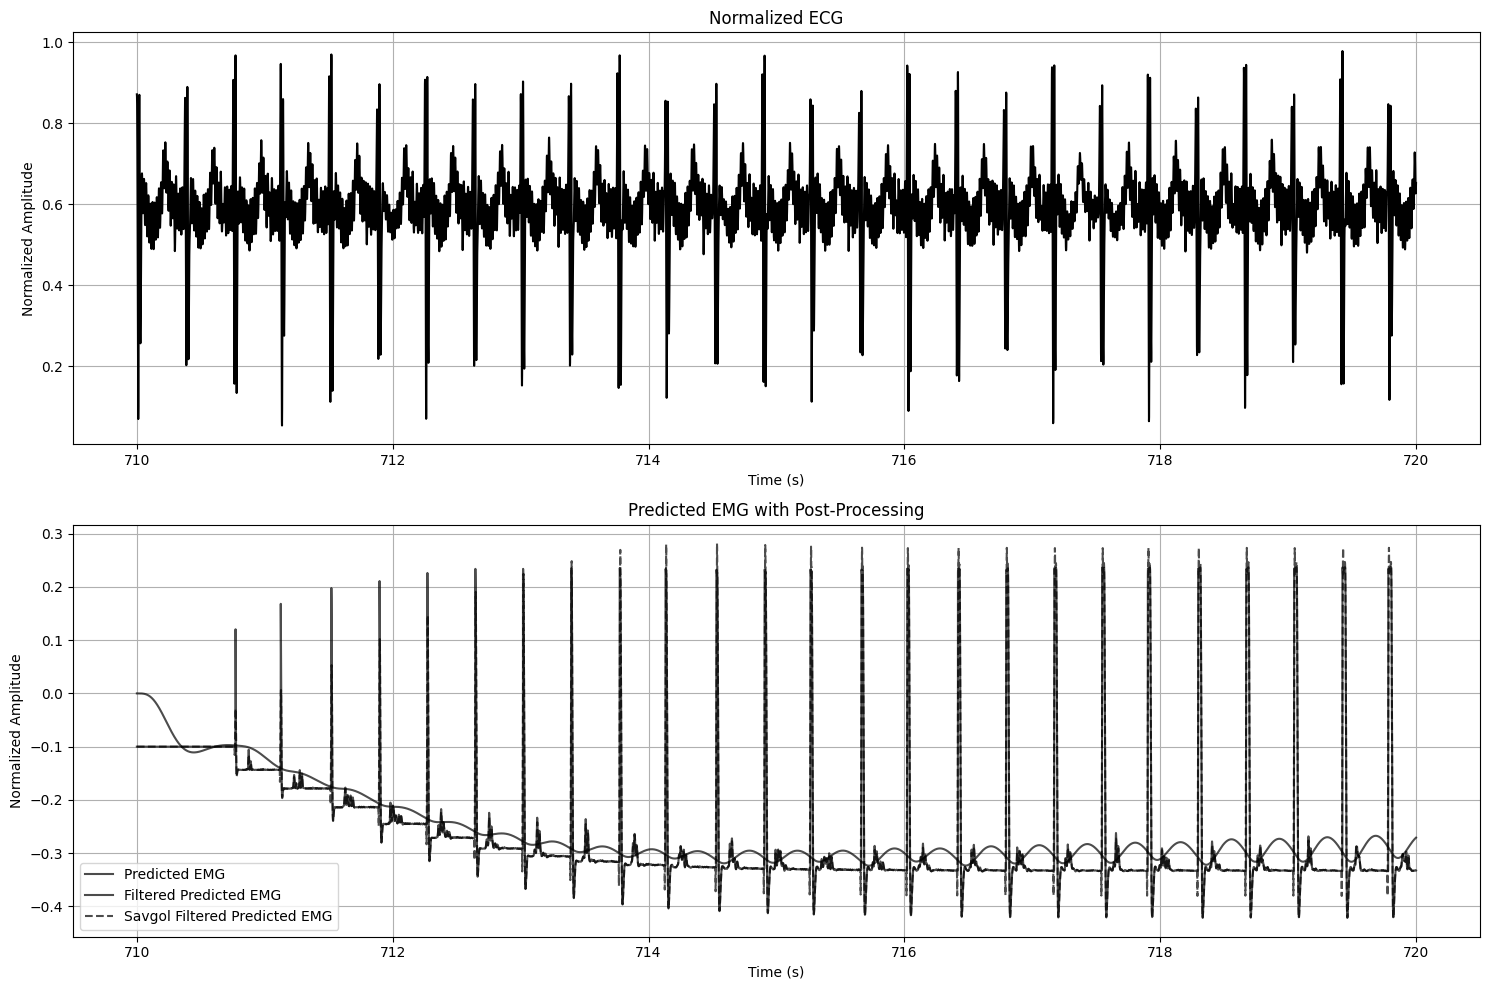

Guardando resultados en CSV...


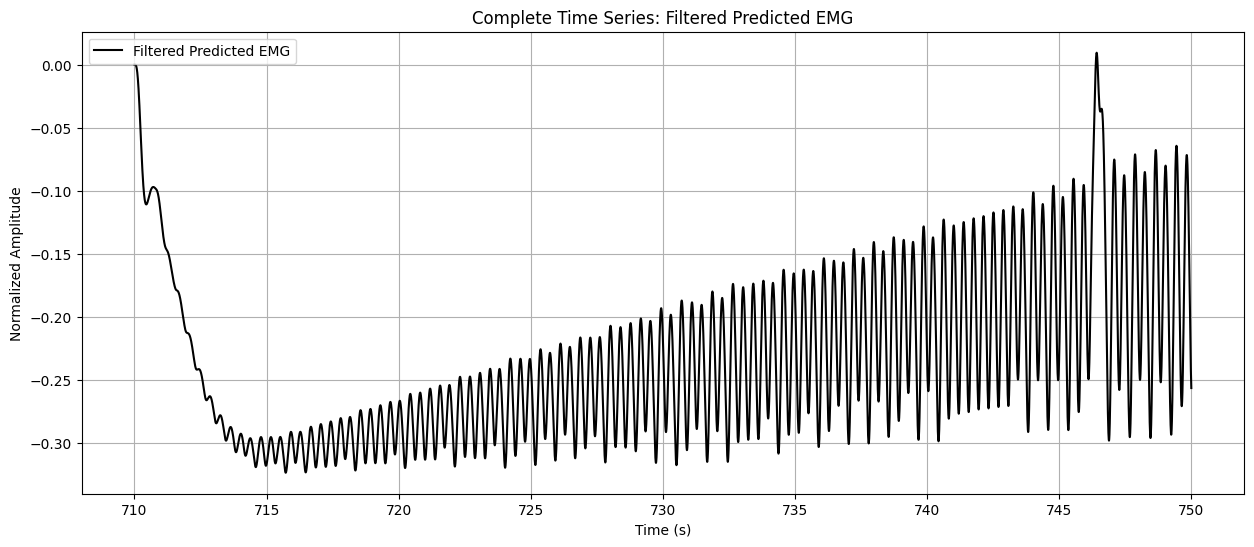

Proceso finalizado.


In [ ]:
import os
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks, lfilter
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from scipy.signal import savgol_filter

# Configuración de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_INTER_OP_PARALLELISM_THREADS'] = '2'
os.environ['TF_INTRA_OP_PARALLELISM_THREADS'] = '2'

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# --- Parámetros (ajustables para el post-procesamiento) ---
fs = 1024
fc_ecg = 80.0
fc_emg = 5.0
orden_filtro = 4
ventana_std_pico_r = 500
factor_std_pico_r = 8
distancia_minima_pico_r_ms = 200
n_ventanas_pasadas = 2
multiplo_rr = 2
ruta_modelo = "modelo_ecg_emg_hibrido_tf_ss.h5"
ruta_dato = "P/P1e.dat"
inicio_seg_nuevo = 710
fin_seg_nuevo = 750
valor_inicial_emg = -0.1  # Valor inicial para EMG

# Parámetros para el filtro Savitzky-Golay
ventana_savgol = 15
orden_savgol = 3

# --- Funciones de preprocesamiento ---
def cargar_datos(path):
    try:
        with open(path, "rb") as f:
            data = f.read()
        floats = np.frombuffer(data, dtype='<f8')
        samples = floats.reshape(-1, 4)
        df = pd.DataFrame(samples, columns=["SIGNAL", "PICOS", "ENV", "EVENTS"])
        return df
    except Exception as e:
        print(f"Error al cargar datos desde {path}: {e}")
        sys.exit(1)

def agregar_tiempo(df, fs):
    df["Tiempo (s)"] = np.arange(len(df)) / fs
    return df

def filtrar_senal(data, fs, fc, orden=4, tipo='low'):
    nyq = 0.5 * fs
    normal_fc = fc / nyq
    b, a = butter(orden, normal_fc, btype=tipo, analog=False)
    return filtfilt(b, a, data)

def butter_lowpass_filter(data, cutoff_freq, sampling_rate, order=4):
    nyquist_freq = 0.5 * sampling_rate
    normalized_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normalized_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

def seleccionar_rango_tiempo(df, inicio_seg, fin_seg):
    df_filtrado = df[(df["Tiempo (s)"] >= inicio_seg) & (df["Tiempo (s)"] <= fin_seg)].copy().reset_index(drop=True)
    return df_filtrado

def normalizar_senal(senal, scaler=None):
    if scaler is None:
        scaler = MinMaxScaler()
        senal_normalizada = scaler.fit_transform(senal.values.reshape(-1, 1))
        return senal_normalizada.flatten(), scaler
    else:
        senal_normalizada = scaler.transform(senal.values.reshape(-1, 1))
        return senal_normalizada.flatten(), scaler

def detectar_picos_r_adaptativo(ecg_normalizado, fs, ventana_std=250, factor_std=5, distancia_minima_ms=50):
    distancia_minima_muestras = int(distancia_minima_ms * fs / 1000)
    altura_minima = np.zeros_like(ecg_normalizado)

    bloque_size = 1000
    n_bloques = len(ecg_normalizado) // bloque_size + 1

    for i in range(n_bloques):
        inicio_bloque = i * bloque_size
        fin_bloque = min((i + 1) * bloque_size, len(ecg_normalizado))

        sub_ecg = ecg_normalizado[inicio_bloque:fin_bloque]
        std_valor = np.std(sub_ecg) * factor_std
        altura_minima[inicio_bloque:fin_bloque] = std_valor

    peaks, _ = find_peaks(ecg_normalizado, height=altura_minima, distance=distancia_minima_muestras)
    return peaks

def calcular_rr_intervals(tiempo_picos_r):
    rr_intervals = np.diff(tiempo_picos_r)
    return rr_intervals

def visualizar_picos_r(tiempo, ecg_normalizado, picos_r):
    plt.figure(figsize=(15, 6))
    plt.plot(tiempo, ecg_normalizado, 'k', label='Normalized ECG')
    plt.plot(tiempo[picos_r], ecg_normalizado[picos_r], "ko", label='Detected R Peaks')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Amplitude')
    plt.title('Detection of R Peaks')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Función principal de predicción con valores iniciales corregidos ---
def predecir_emg_desde_ecg(modelo, df_datos, picos_r_indices, rr_intervals, fs, multiplo_rr, n_ventanas_pasadas, TIME_STEPS, valor_inicial_emg=0.5):
    if modelo is None:
        print("ERROR: El modelo no está cargado correctamente")
        sys.exit(1)

    df_resultados = df_datos.copy()
    # Inicializar la columna de predicción con el valor inicial especificado en lugar de NaN
    df_resultados['emg_predicho'] = valor_inicial_emg

    # Inicializar el historial de EMG con un valor inicial no nulo
    # Crear arrays llenos con el valor inicial en lugar de ceros
    historial_emg_pasado = [np.full((1, TIME_STEPS, 1), valor_inicial_emg, dtype='float32') for _ in range(n_ventanas_pasadas)]

    if len(picos_r_indices) <= n_ventanas_pasadas:
        print(f"No hay suficientes picos R detectados (se necesitan al menos {n_ventanas_pasadas+1})")
        return df_resultados

    for i in range(len(picos_r_indices) - n_ventanas_pasadas):
        inicio_rr = max(0, i)
        fin_rr = min(len(rr_intervals), i + n_ventanas_pasadas)

        if fin_rr <= inicio_rr:
            continue

        rr_promedio = np.mean(rr_intervals[inicio_rr:fin_rr])
        longitud_ventana = int(multiplo_rr * rr_promedio * fs)

        if longitud_ventana <= 0:
            continue

        start_index_actual = picos_r_indices[i + n_ventanas_pasadas]
        end_index_actual = min(start_index_actual + longitud_ventana, len(df_datos))

        ecg_segment = df_datos['ecg_normalizado'].iloc[start_index_actual:end_index_actual].values
        
        # Modificación del padding: usar el valor inicial para rellenar en lugar de ceros
        # Usar 'pre' para mantener la información temporal más reciente
        ecg_padded = pad_sequences([ecg_segment], maxlen=TIME_STEPS, padding='post', 
                                  value=0.0, dtype='float32')  # Mantenemos 0 para ECG
        X_ecg = np.expand_dims(ecg_padded, axis=-1)

        try:
            prediccion = modelo.predict([X_ecg] + historial_emg_pasado, verbose=0)
            valores_pred = prediccion[0].flatten()[:end_index_actual - start_index_actual]

            if start_index_actual + len(valores_pred) <= len(df_resultados):
                df_resultados.loc[start_index_actual:start_index_actual+len(valores_pred)-1, 'emg_predicho'] = valores_pred

            # Usar el valor inicial para el padding del historial de EMG
            emg_padded_pred = pad_sequences([valores_pred], maxlen=TIME_STEPS, padding='post', 
                                          value=valor_inicial_emg, dtype='float32')
            historial_emg_pasado.append(np.expand_dims(emg_padded_pred, axis=-1))
            historial_emg_pasado = historial_emg_pasado[-n_ventanas_pasadas:]

        except Exception as e:
            print(f"Error durante la predicción: {e}")
            continue

    return df_resultados

# --- Función para aplicar post-procesamiento con manejo mejorado de valores iniciales ---
def post_procesar_emg(df_resultados, fs, ventana_savgol, orden_savgol, valor_inicial_emg=0.5):
    """Aplica técnicas de post-procesamiento a la señal EMG predicha."""
    # Aseguramos que los valores NaN estén reemplazados por el valor inicial antes del procesamiento
    df_resultados['emg_predicho'] = df_resultados['emg_predicho'].fillna(valor_inicial_emg)
    
    emg_predicho = df_resultados['emg_predicho'].values

    # 1. Filtro Savitzky-Golay para suavizado
    try:
        # Aseguramos que la ventana sea impar y menor que la longitud de los datos
        ventana_savgol_ajustada = min(ventana_savgol, len(emg_predicho) - 1)
        if ventana_savgol_ajustada % 2 == 0:
            ventana_savgol_ajustada -= 1
        
        if ventana_savgol_ajustada > orden_savgol and ventana_savgol_ajustada > 2:
            emg_suavizado_savgol = savgol_filter(emg_predicho, ventana_savgol_ajustada, orden_savgol)
            df_resultados['emg_predicho_suavizado_savgol'] = emg_suavizado_savgol
        else:
            print(f"Advertencia: Ventana Savitzky-Golay demasiado pequeña. Usando valores sin suavizar.")
            df_resultados['emg_predicho_suavizado_savgol'] = emg_predicho
    except Exception as e:
        print(f"Error al aplicar filtro Savitzky-Golay: {e}")
        df_resultados['emg_predicho_suavizado_savgol'] = emg_predicho

    return df_resultados

# --- Programa principal (con correcciones) ---
if __name__ == "__main__":
    print("Iniciando el proceso de predicción...")

    if not os.path.exists(ruta_modelo):
        print(f"ERROR: El archivo del modelo no existe en la ruta: {ruta_modelo}")
        sys.exit(1)

    modelo_cargado = None
    try:
        print(f"Intentando cargar el modelo desde: {ruta_modelo}")
        modelo_cargado = load_model(ruta_modelo, custom_objects={'mse': MeanSquaredError})
        print(f"Modelo cargado exitosamente desde: {ruta_modelo}")
        TIME_STEPS = modelo_cargado.input[0].shape[1]
        print(f"TIME_STEPS del modelo: {TIME_STEPS}")
    except Exception as e:
        print(f"ERROR CRÍTICO al cargar el modelo: {e}")
        import traceback
        traceback.print_exc()
        sys.exit(1)

    if not os.path.exists(ruta_dato):
        print(f"ERROR: El archivo de datos no existe en la ruta: {ruta_dato}")
        sys.exit(1)

    print("Cargando y preprocesando datos...")
    df_nuevo = cargar_datos(ruta_dato)
    df_nuevo = agregar_tiempo(df_nuevo, fs)
    df_nuevo_filtrado = seleccionar_rango_tiempo(df_nuevo, inicio_seg_nuevo, fin_seg_nuevo)

    print("Filtrando señales...")
    senal_ecg = df_nuevo_filtrado["SIGNAL"].values
    ecg_filtrado = filtrar_senal(senal_ecg, fs, fc_ecg, orden_filtro, 'low')

    print("Normalizando señales...")
    ecg_normalizado, _ = normalizar_senal(pd.Series(ecg_filtrado))

    df_nuevo_filtrado['ecg_filtrado'] = ecg_filtrado
    df_nuevo_filtrado['ecg_normalizado'] = ecg_normalizado

    print("Detectando picos R...")
    picos_r_indices = detectar_picos_r_adaptativo(
        ecg_normalizado, fs, ventana_std_pico_r, factor_std_pico_r, distancia_minima_pico_r_ms)

    tiempo = df_nuevo_filtrado["Tiempo (s)"].values
    print(f"Se detectaron {len(picos_r_indices)} picos R.")
    visualizar_picos_r(tiempo, ecg_normalizado, picos_r_indices)

    tiempo_picos_r = tiempo[picos_r_indices]
    rr_intervals = calcular_rr_intervals(tiempo_picos_r)
    print(f"Intervalo RR promedio: {np.mean(rr_intervals):.4f} segundos.")

    print("Realizando predicciones...")
    if modelo_cargado is None:
        print("ERROR: El modelo no se cargó correctamente antes de la predicción")
        sys.exit(1)

    # Pasar el valor inicial de EMG a la función de predicción
    df_resultados = predecir_emg_desde_ecg(
        modelo_cargado, df_nuevo_filtrado, picos_r_indices, rr_intervals,
        fs, multiplo_rr, n_ventanas_pasadas, TIME_STEPS, valor_inicial_emg)

    # Aplicar post-procesamiento a la señal EMG predicha, pasando el valor inicial
    print("Aplicando post-procesamiento a la señal EMG predicha...")
    df_resultados = post_procesar_emg(df_resultados, fs, ventana_savgol, orden_savgol, valor_inicial_emg)

    print("Aplicando filtro pasabajos para suavizar la señal EMG predicha...")
    # Usar todos los valores de emg_predicho, rellenando NaN con valor_inicial_emg
    emg_predicho_valores = df_resultados['emg_predicho'].fillna(valor_inicial_emg).values
    cutoff_frecuencia_emg = 2.0
    emg_filtrado = butter_lowpass_filter(emg_predicho_valores, cutoff_frecuencia_emg, fs, order=4)
    
    # Asignar el resultado filtrado a todos los índices
    df_resultados['emg_predicho_filtrado'] = emg_filtrado[:len(df_resultados)]

    print("Visualizando resultados...")
    # Seleccionar los primeros 10 segundos con datos para visualización
    if len(df_resultados) > 0:
        inicio_vis = df_resultados.loc[0, 'Tiempo (s)']
        fin_vis = inicio_vis + 10
        fin_vis = min(fin_vis, df_resultados['Tiempo (s)'].max())

        df_vis = df_resultados[(df_resultados['Tiempo (s)'] >= inicio_vis) &
                                (df_resultados['Tiempo (s)'] <= fin_vis)]

        plt.figure(figsize=(15, 10))

        plt.subplot(2, 1, 1)
        plt.plot(df_vis['Tiempo (s)'], df_vis['ecg_normalizado'], 'k')
        plt.title('Normalized ECG')
        plt.xlabel('Time (s)')
        plt.ylabel('Normalized Amplitude')
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(df_vis['Tiempo (s)'], df_vis['emg_predicho'], 'k', label='Predicted EMG', alpha=0.7)
        if 'emg_predicho_filtrado' in df_vis.columns:
            plt.plot(df_vis['Tiempo (s)'], df_vis['emg_predicho_filtrado'], 'k', label='Filtered Predicted EMG', alpha=0.7)
        if 'emg_predicho_suavizado_savgol' in df_vis.columns:
            plt.plot(df_vis['Tiempo (s)'], df_vis['emg_predicho_suavizado_savgol'], 'k--', label='Savgol Filtered Predicted EMG', alpha=0.7)
        plt.title('Predicted EMG with Post-Processing')
        plt.xlabel('Time (s)')
        plt.ylabel('Normalized Amplitude')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

        print("Guardando resultados en CSV...")
        df_resultados.to_csv('resultados_prediccion_nuevos_datos_postproc.csv', index=False)

        # Último gráfico solo con el EMG filtrado
        plt.figure(figsize=(15, 6))
        if 'emg_predicho_filtrado' in df_resultados.columns:
            plt.plot(df_resultados['Tiempo (s)'], df_resultados['emg_predicho_filtrado'], 'k', label='Filtered Predicted EMG')
        plt.title('Complete Time Series: Filtered Predicted EMG')
        plt.xlabel('Time (s)')
        plt.ylabel('Normalized Amplitude')
        plt.grid(True)
        plt.legend()
        plt.savefig('emg_predicho_completo_postproc.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("No se generaron datos válidos para visualizar.")
    
    print("Proceso finalizado.")